In [0]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import metrics

In [0]:
#read data from csv
data = pd.read_csv('http://gunet2.cs.unipi.gr/modules/document/file.php/TMI100/Datasets/bankruptcy.csv')
#set name of target variable (column name)
target_var = 'Bankrupt'
#set criterion ["gini", "entropy"]
criterion = 'entropy'

In [3]:
#show 5 random rows
data.sample(n=5)

,Company,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
43,Qwest,-6.1,0.0,9.4,22.6,2.123,no
4,Convergent Communications,26.1,-57.4,-23.5,54.2,0.855,yes
45,Telephone and Data Systems,-5.3,31.0,4.9,26.9,1.362,no
12,Metricom,33.9,-46.5,-17.5,0.9,0.828,yes
41,Openwave Systems,20.3,-61.3,1.9,27.0,35.178,no


In [4]:
#Get data columns
columns = list(data.columns)
columns

['Company', 'WC/TA', 'RE/TA', 'EBIT/TA', 'S/TA', 'BVE/BVL', 'Bankrupt']

In [5]:
#create feature columns by removing target variable
# 'Company' column 
feature_cols = [x for x in columns if x not in ['Company', target_var]]
feature_cols

['WC/TA', 'RE/TA', 'EBIT/TA', 'S/TA', 'BVE/BVL']

In [0]:
X = data[feature_cols] # Features
y = data[target_var] # Target variable

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion=criterion)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


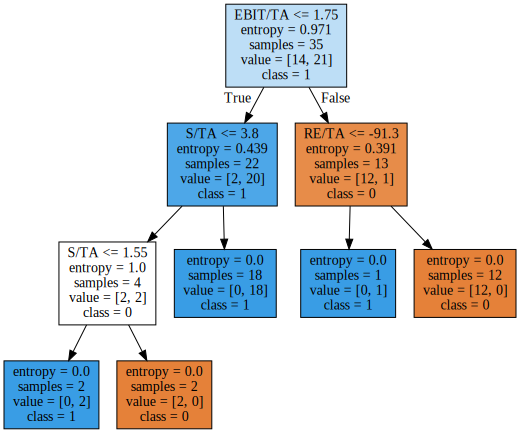

In [15]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=feature_cols, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [0]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [20]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333
